# IMPORT MODULES

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# LOADING THE DATASET

In [77]:
df=pd.read_csv(r"C:\Users\Nikhil\Downloads\train.csv")
df.drop(columns=['ID'],axis=0,inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [25]:
# Statistical Info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [27]:
# Datatype Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.6 KB


PREPROCESSING THE DATASET

In [29]:
# check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

EXPLORATORY DATA ANALYSIS

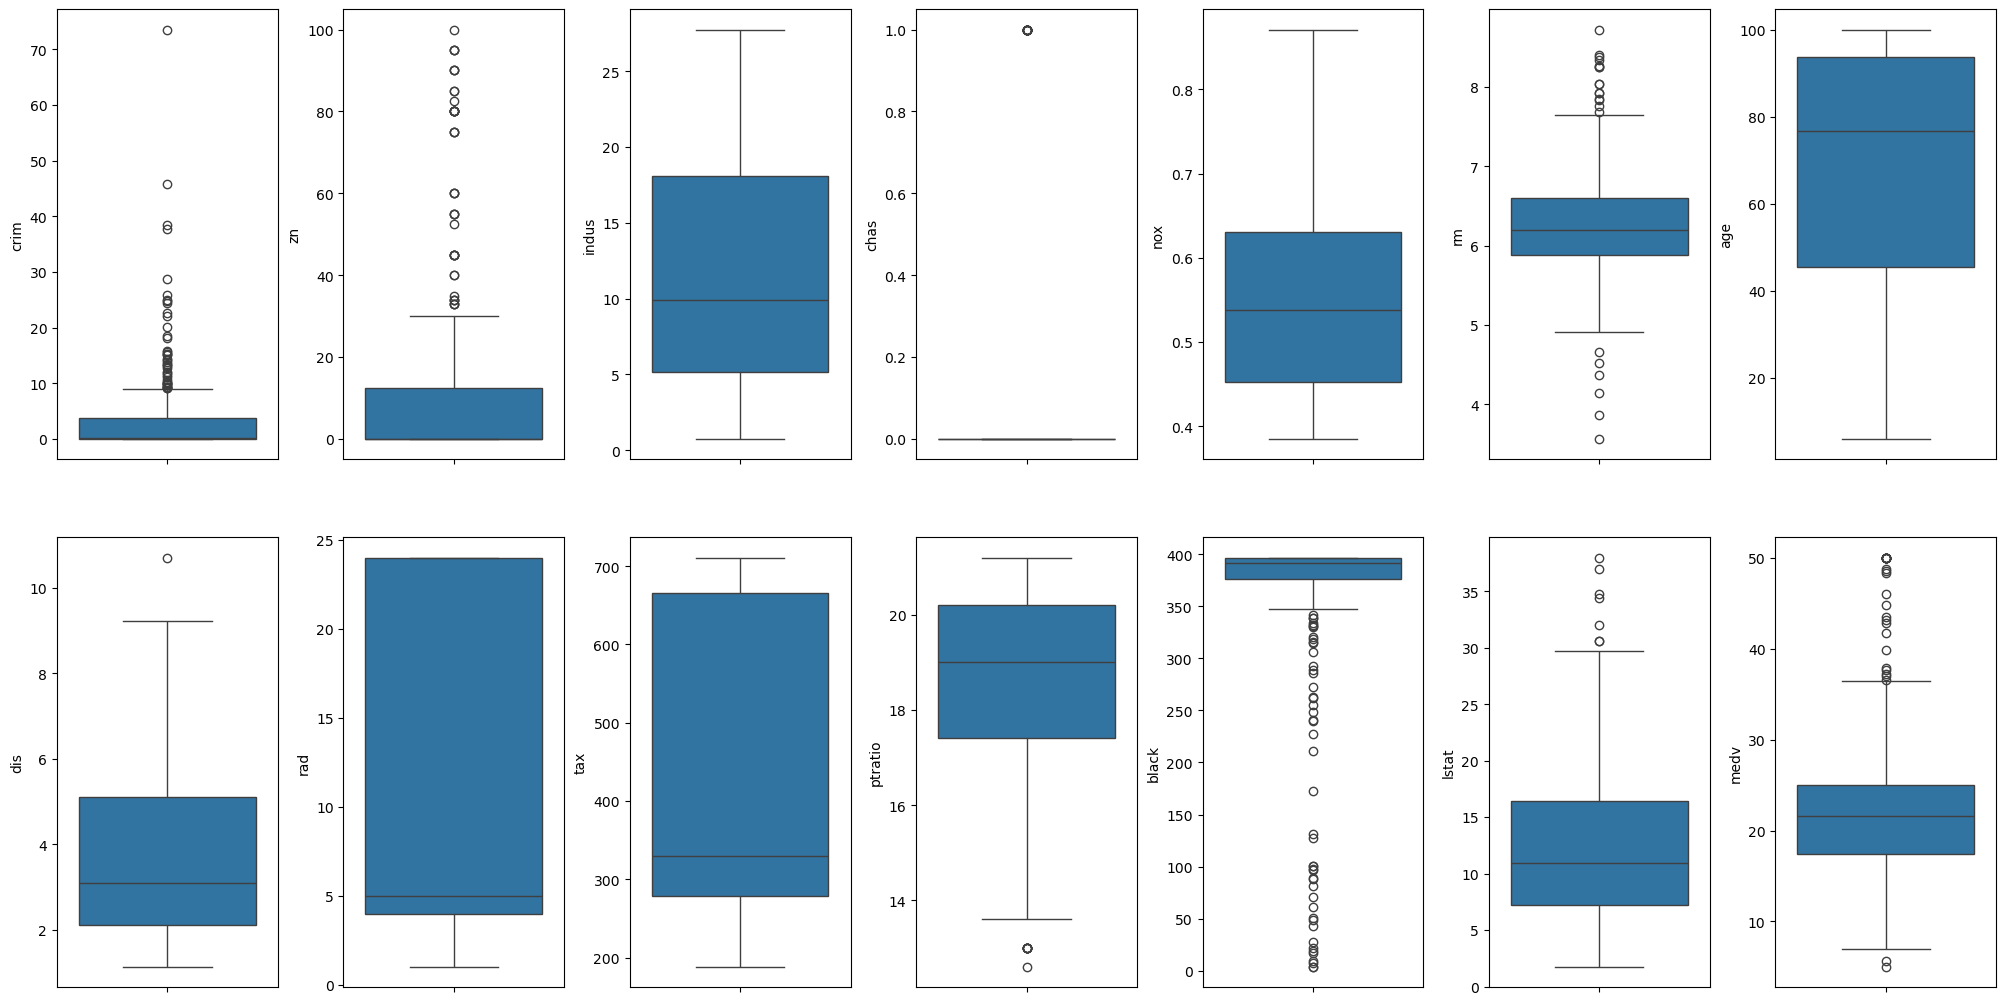

In [35]:
# create box plots
fig,ax= plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1
# hyperparameter tuning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)



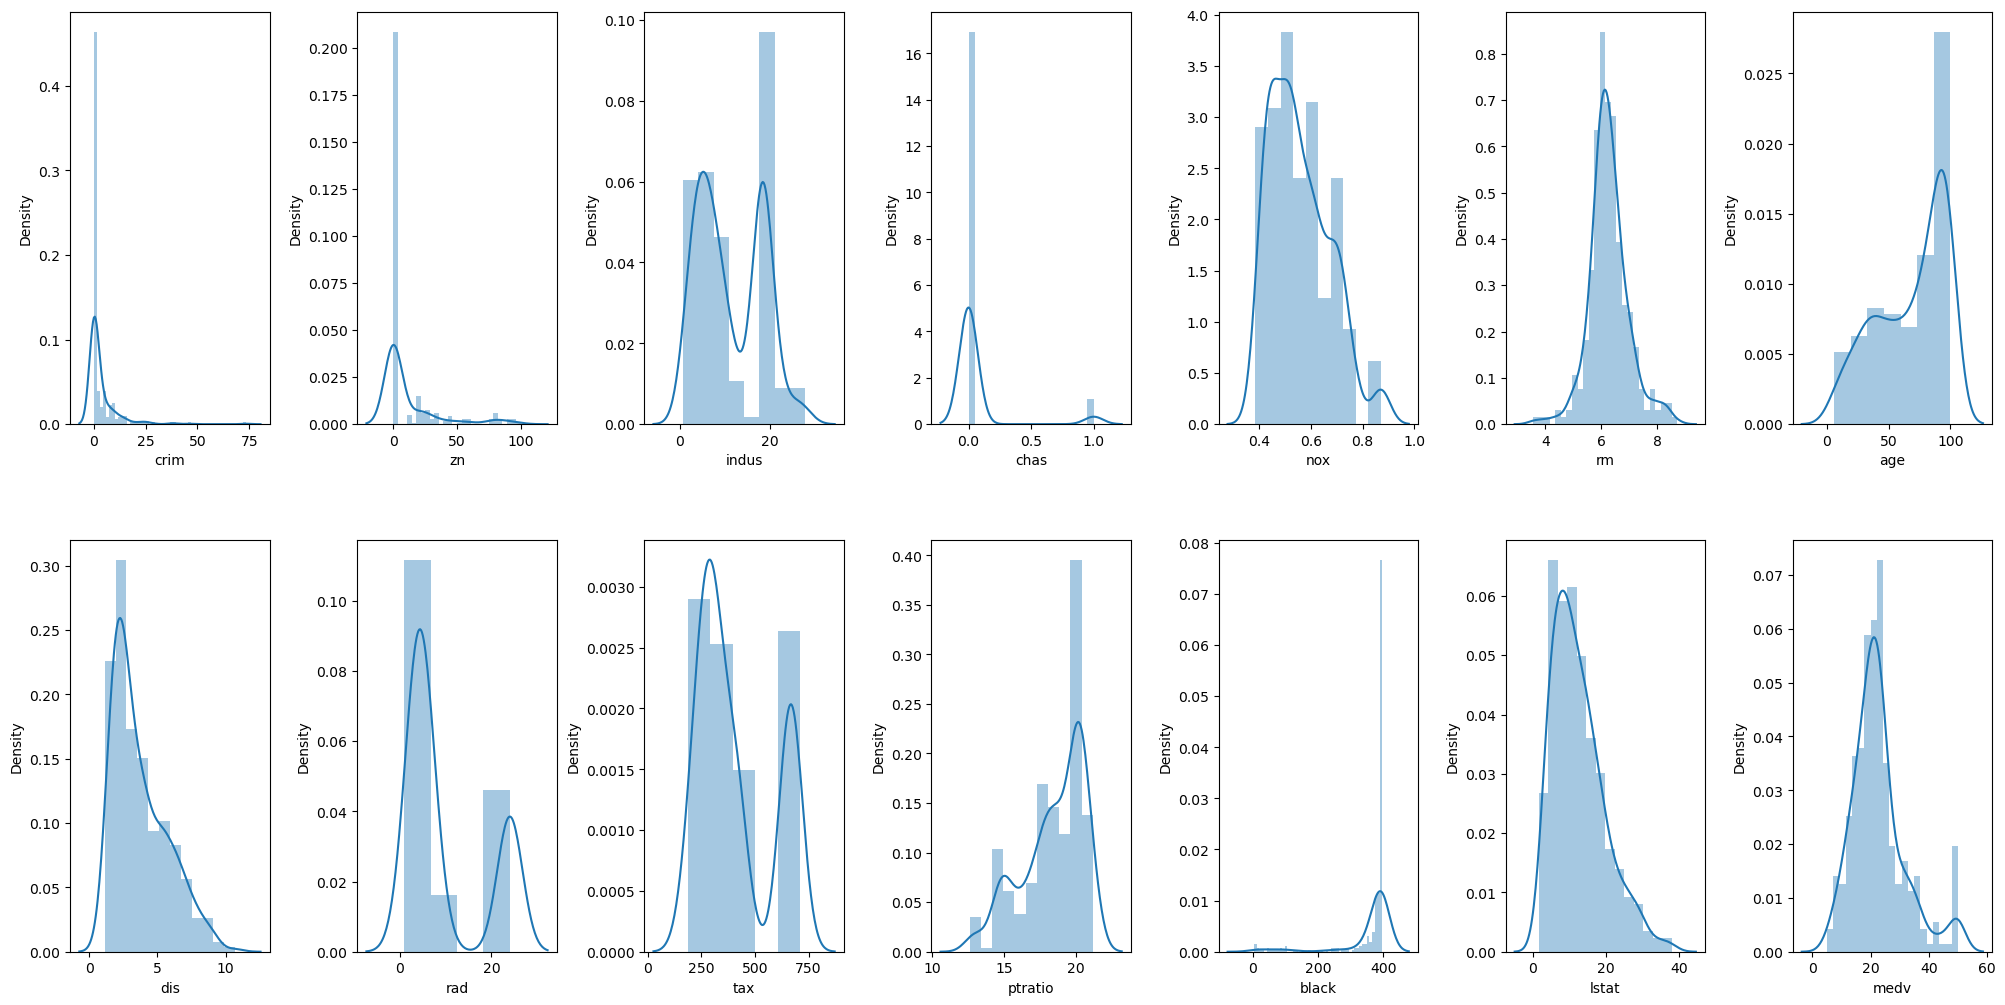

In [43]:
# create dist plot
fig,ax= plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
# hyperparameter tuning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# MIN-MAX NORMALIZATION

In [45]:
cols =['crim','zn','tax','black']
for col in cols:
    # find min and max of that column
    minimum=min(df[col])
    maximum=max(df[col])
    df[col]=(df[col]-minimum)/(maximum-minimum)

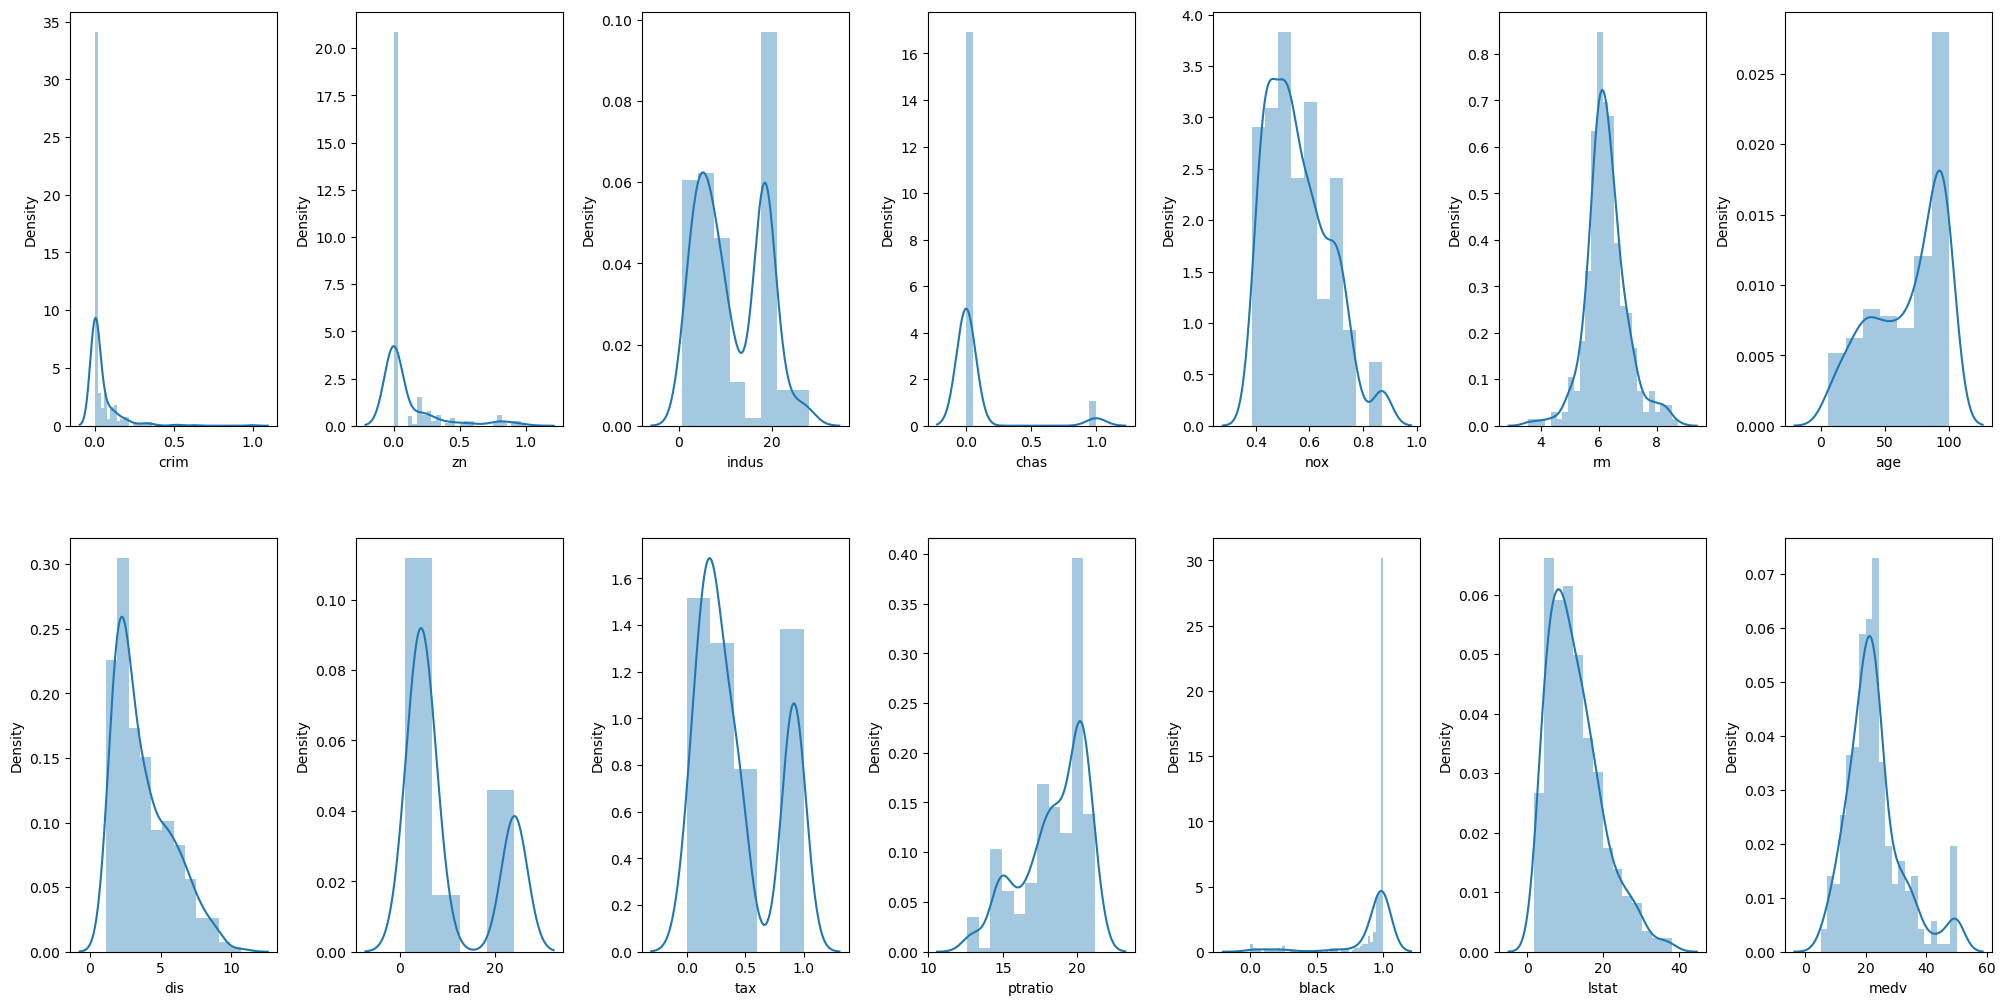

In [47]:
fig,ax= plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
# hyperparameter tuning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# STANDARDIZATION

In [57]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()

# fit our data
scaled_cols=scalar.fit_transform(df[cols])
scaled_cols=pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.456875,0.322906,-0.664062,0.432990
1,-0.454016,-0.472123,-0.980620,0.432990
2,-0.453327,-0.472123,-1.097863,0.406733
3,-0.448330,-0.472123,-1.097863,0.432990
4,-0.445709,0.079980,-0.576130,0.417953


In [59]:
for col in cols:
    df[col]=scaled_cols[col]

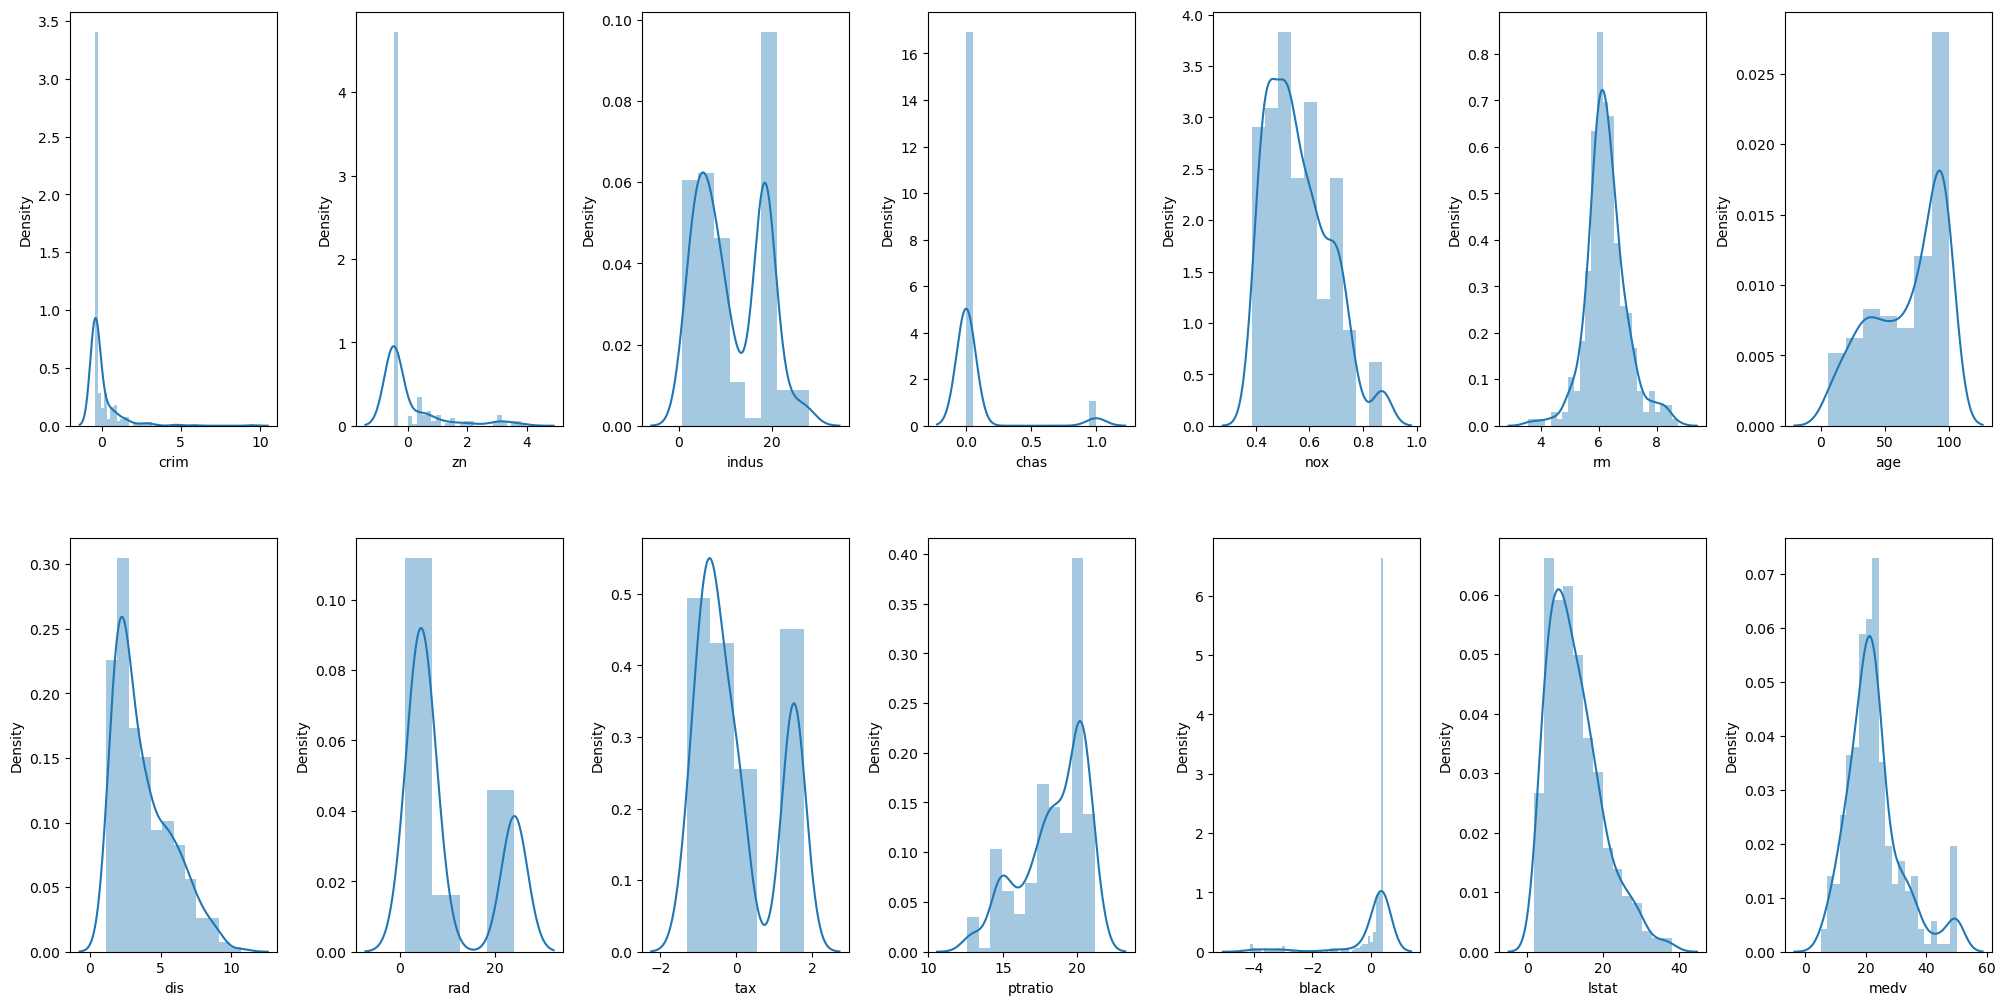

In [61]:
fig,ax= plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index+=1
# hyperparameter tuning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# COORELATION MATRIX

<Axes: >

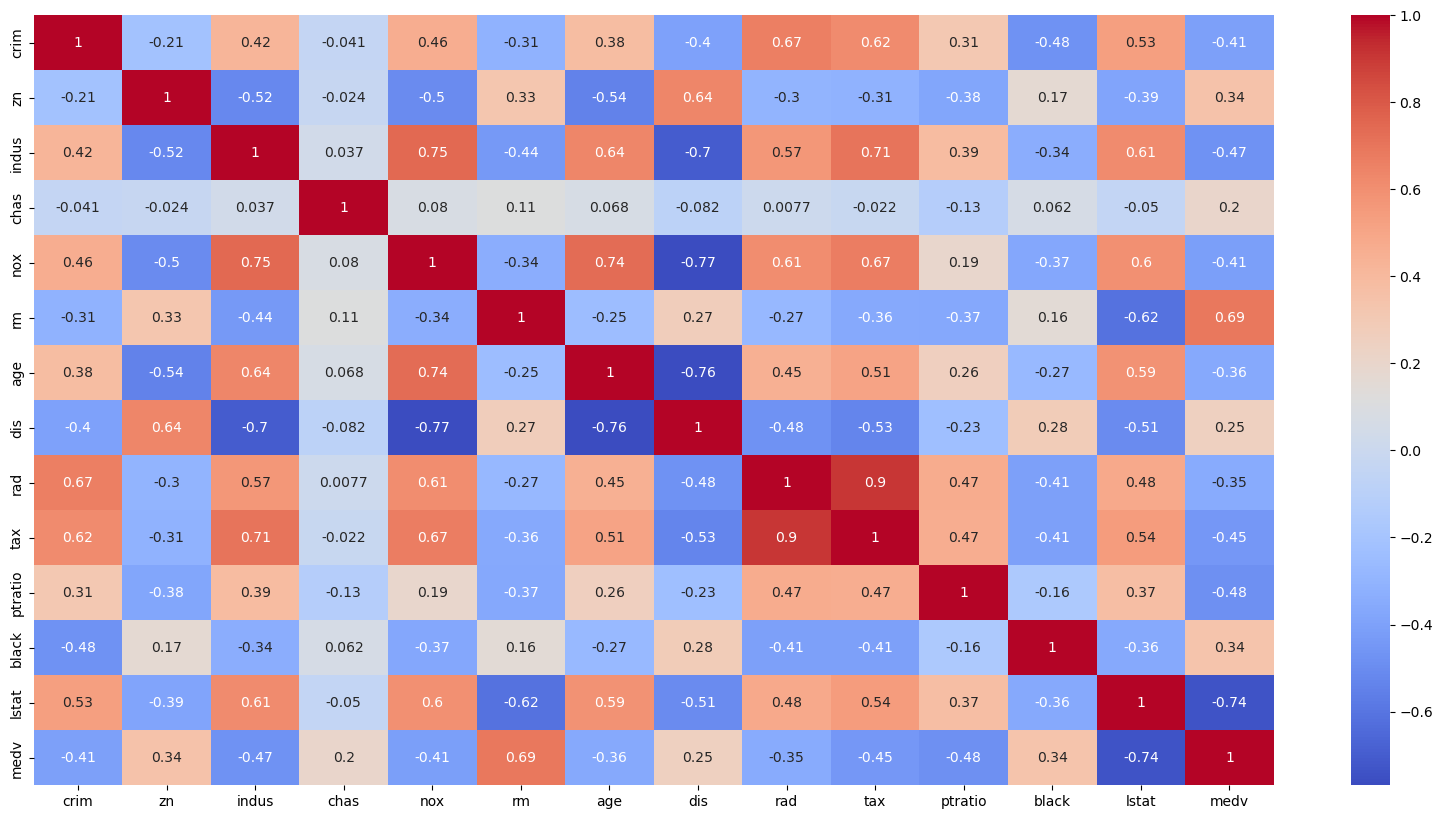

In [63]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='lstat', ylabel='medv'>

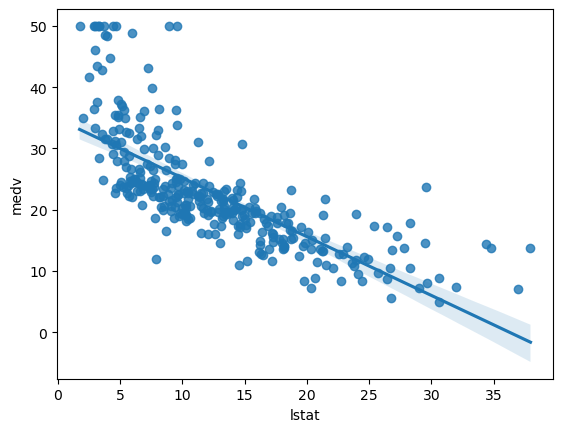

In [67]:
sns.regplot(y=df['medv'],x=df['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

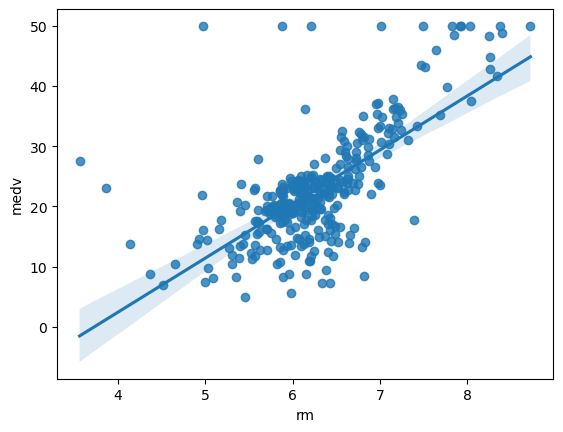

In [69]:
sns.regplot(y=df['medv'],x=df['rm'])

# INPUT SPLIT

In [79]:
df=df[~((df['crim']>=25))]
df=df[~((df['rm']>=8.5)|(df['rm']<4))]
df=df[~((df['lstat']>=30))]

In [81]:
X_DF = df[['lstat','rm','indus','ptratio','tax','nox','crim','age']]
X = X_DF.values
X

array([[4.980e+00, 6.575e+00, 2.310e+00, ..., 5.380e-01, 6.320e-03,
        6.520e+01],
       [9.140e+00, 6.421e+00, 7.070e+00, ..., 4.690e-01, 2.731e-02,
        7.890e+01],
       [2.940e+00, 6.998e+00, 2.180e+00, ..., 4.580e-01, 3.237e-02,
        4.580e+01],
       ...,
       [9.080e+00, 6.120e+00, 1.193e+01, ..., 5.730e-01, 4.527e-02,
        7.670e+01],
       [5.640e+00, 6.976e+00, 1.193e+01, ..., 5.730e-01, 6.076e-02,
        9.100e+01],
       [7.880e+00, 6.030e+00, 1.193e+01, ..., 5.730e-01, 4.741e-02,
        8.080e+01]])

In [83]:
Y_DF = df[['medv']]
Y = Y_DF.values
Y

array([[24. ],
       [21.6],
       [33.4],
       [36.2],
       [22.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [20.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [14.8],
       [12.7],
       [14.5],
       [13.5],
       [24.7],
       [30.8],
       [34.9],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [19.4],
       [19.7],
       [20.5],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [18.7],
       [16. ],
       [25. ],
       [33. ],
       [23.5],
       [19.4],
       [22. ],
       [17.4],
       [24.2],
       [22.8],
       [23.4],
       [24.1],
       [21.4],
       [20. ],
       [20.8],
       [28. ],
       [23.9],
       [22.9],
       [23.9],
       [26.6],
       [22.5],
       [22.2],
       [23.6],
       [28.7],
       [22.6],
       [25. ],
       [20.6],
       [21

# CREATING AND TRAINING THE MODEL

In [59]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X,Y)


LinearRegression()

# MODEL EVALUATION

In [61]:
# print the intercept
print(lm.intercept_)

[12.16872968]


In [63]:
print(lm.coef_)

[[-7.19484858e-01  5.34359785e+00  1.26504710e-01 -7.81817665e-01
  -2.89044912e-03 -2.60911011e+00  5.63687328e-02  1.86447916e-02]]


In [65]:
Y_pred = lm.predict(X)
print("Predicted Values :\n",Y_pred)

Predicted Values :
 [[31.00698907]
 [26.43136592]
 [32.12283589]
 [31.35814701]
 [23.44382329]
 [20.14812865]
 [23.12898016]
 [19.91236364]
 [21.52310353]
 [21.2933417 ]
 [20.65854697]
 [22.07498192]
 [15.96077695]
 [11.02912214]
 [18.12446737]
 [15.62005957]
 [13.16840899]
 [16.07880885]
 [10.5750719 ]
 [19.49432457]
 [14.32708137]
 [20.96788057]
 [28.93043018]
 [32.79489544]
 [26.12146498]
 [25.17227804]
 [23.51790757]
 [20.86222434]
 [18.57482066]
 [17.50861812]
 [16.65353076]
 [20.94377223]
 [24.96832625]
 [24.28734984]
 [15.45602697]
 [32.30789495]
 [27.38598675]
 [33.05388897]
 [23.86695316]
 [17.87214799]
 [18.65472247]
 [25.52769355]
 [29.37104078]
 [28.58041273]
 [22.13347621]
 [22.08003098]
 [17.26372657]
 [26.14915688]
 [25.15415654]
 [24.63866133]
 [25.63981653]
 [24.8832538 ]
 [23.21619217]
 [23.16063572]
 [28.77253665]
 [27.49501185]
 [24.42865993]
 [24.5042817 ]
 [28.16670086]
 [20.12064798]
 [24.08644301]
 [31.72513963]
 [31.53322073]
 [25.81374706]
 [27.11277104]
 [25.

# FINDING METRICS

In [69]:
from sklearn import metrics

In [71]:
# print('MAE:',metrics.mean_absolute_error(Y,Y_pred))
# print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y,Y_pred)))

RMSE: 4.916284302163123


# TEST DATA

In [85]:
test_df = pd.read_csv(r"C:\Users\Nikhil\Downloads\test.csv")
test_df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [87]:
X_test = test_df[['lstat','rm','indus','ptratio','tax','nox','crim','age']].values


y_test_pred = lm.predict(X_test)
for x, y in zip(test_df['ID'],y_test_pred):
    print(x, y, sep='\t\t')

3		[33.85856388]
6		[27.69481744]
8		[20.01705336]
9		[9.44659407]
10		[20.40553285]
18		[17.51003005]
20		[18.31295909]
25		[16.21387453]
26		[14.17458613]
27		[16.61750091]
29		[21.79014061]
30		[23.21717856]
33		[7.9538319]
34		[13.58671836]
36		[21.81756194]
37		[19.95633294]
38		[21.53185882]
42		[29.96108933]
49		[5.67990036]
53		[29.28961304]
60		[21.33678643]
63		[26.33954371]
70		[21.84123223]
72		[21.64610633]
79		[22.30848147]
80		[22.40932351]
83		[25.44815008]
92		[26.33351513]
93		[27.4054216]
96		[28.20410204]
98		[38.01506739]
99		[36.41377436]
100		[32.84646915]
105		[20.21357106]
106		[15.67085348]
111		[19.21559717]
113		[18.51572554]
114		[18.89126578]
116		[18.83472569]
126		[21.41049371]
130		[14.21401783]
131		[22.77875668]
133		[23.37949168]
136		[18.98376141]
141		[12.84234145]
144		[12.02103385]
145		[6.82168615]
147		[19.79588876]
152		[20.98645504]
153		[19.48178784]
156		[23.52206157]
158		[36.09274837]
163		[42.65323497]
169		[28.11095763]
185		[18.2985838